In [ ]:
!nvidia-smi

Tue Apr 23 18:01:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/dataset.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall('/content')
  print('Done')

Done


In [ ]:
training_Data = []

In [ ]:
# ANGRY

i = 0
path = '/content/dataset/train/angry'
for img in os.listdir(path):
  # if i==1470:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,0])
  except Exception as e:
    pass

In [ ]:
len(training_Data)

3984

In [ ]:
# DISGUST

i = 0
path = '/content/dataset/train/disgust'

for img in os.listdir(path):
  # if i==158:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,1])
  except Exception as e:
    pass

In [ ]:
# HAPPY

i = 0
path = '/content/dataset/train/happy'

for img in os.listdir(path):
  # if i==2625:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,3])
  except Exception as e:
    pass

In [ ]:
# NEUTRAL

i = 0
path = '/content/dataset/train/neutral'

for img in os.listdir(path):
  # if i==1816:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,4])
  except Exception as e:
    pass

In [ ]:
# SAD

i = 0
path = '/content/dataset/train/sad'

for img in os.listdir(path):
  # if i==1764:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,5])
  except Exception as e:
    pass

In [ ]:
# SURPRISE

i = 0
path = '/content/dataset/train/surprise'

for img in os.listdir(path):
  # if i==1155:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,6])
  except Exception as e:
    pass

In [ ]:
len(training_Data)

24479

In [ ]:
import random
random.shuffle(training_Data)

In [ ]:
X = []
Y = []

for feature,label in training_Data:
  X.append(feature)
  Y.append(label)

X = np.array(X).reshape(-1,48,48,3) #Converting to 4 dimensions

In [ ]:
X = X/255.0

In [ ]:
Y = np.array(Y)

In [ ]:
input_shape = (48,48,3)

In [ ]:
#model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False,weights='imagenet')
model = tf.keras.applications.RegNetY002(input_shape=input_shape, include_top=False,weights='imagenet')

11847872/11847872 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "regnety002"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 regnety002_prestem_rescali  (None, 48, 48, 3)            0         ['input_1[0][0]']             
 ng (Rescaling)                                                                                   
                                                                                                  
 regnety002_stem_conv (Conv  (None, 24, 24, 32)           864       ['regnety002_prestem_rescaling
 2D)                                                                [0][0]']                      
                                                                                         

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout,BatchNormalization, Flatten
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [ ]:
base_output=model.layers[-2].output

In [ ]:
x = Flatten()(base_output)

x=Dense(512,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

In [ ]:
# emotion_model = Model(inputs=model.input, outputs=final_output)
emotion_model = Model(inputs=model.input, outputs=predictions)

In [ ]:
emotion_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
emotion_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 26, 26, 64)           0         ['conv1_conv[0][0]']          
                                                                                              

In [ ]:
datagen = ImageDataGenerator(
    # rescale = 1./255,
    rotation_range=10,  # Rotate the image by up to 10 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift the image vertically by up to 10% of the height
    shear_range=0.1,  # Apply shear transformation
    zoom_range=0.1,  # Zoom the image by up to 10%
    horizontal_flip=True,  # Flip the image horizontally
    vertical_flip=False,  # Do not flip the image vertically
    fill_mode='nearest'  # Fill in newly created pixels using the nearest existing pixel
)

In [ ]:
train_generator = datagen.flow(X, Y, batch_size=20)

In [ ]:
def scheduler(epoch,lr):
  if epoch < 10:
    return lr
  else:
    return lr * 0.9

In [ ]:
lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
emotion_model.fit(train_generator,epochs=20,callbacks=[lr_scheduler])

Epoch 1/20
1224/1224 [==============================] - 50s 32ms/step - loss: 1.6268 - accuracy: 0.3215 - lr: 0.0010
Epoch 2/20
1224/1224 [==============================] - 37s 30ms/step - loss: 1.5582 - accuracy: 0.3434 - lr: 0.0010
Epoch 3/20
1224/1224 [==============================] - 38s 31ms/step - loss: 1.5434 - accuracy: 0.3566 - lr: 0.0010
Epoch 4/20
1224/1224 [==============================] - 37s 30ms/step - loss: 1.5376 - accuracy: 0.3605 - lr: 0.0010
Epoch 5/20
1224/1224 [==============================] - 39s 31ms/step - loss: 1.5305 - accuracy: 0.3665 - lr: 0.0010
Epoch 6/20
1224/1224 [==============================] - 37s 30ms/step - loss: 1.5258 - accuracy: 0.3668 - lr: 0.0010
Epoch 7/20
1224/1224 [==============================] - 35s 29ms/step - loss: 1.5207 - accuracy: 0.3701 - lr: 0.0010
Epoch 8/20
1224/1224 [==============================] - 37s 30ms/step - loss: 1.5177 - accuracy: 0.3747 - lr: 0.0010
Epoch 9/20
1224/1224 [==============================] - 38s 31ms

In [ ]:
emotion_model.evaluate(X,Y)

765/765 [==============================] - 15s 14ms/step - loss: 2.0733 - accuracy: 0.2257


[2.0732812881469727, 0.2257036715745926]

In [ ]:
file_path = "/content/drive/MyDrive/RegNetY00v2.h5"
emotion_model.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']
test_images = []
test_labels = []
predictions = []

testPath = '/content/dataset/test/'
for label in os.listdir(testPath):
  emotion_folders = os.path.join(testPath,label)
  for images in os.listdir(emotion_folders):
    img_arr = cv2.imread(os.path.join(emotion_folders,images))
    # new_arr = cv2.resize(img_arr,(224,224))
    image = np.expand_dims(img_arr,axis=0)
    test_images.append(image)
    test_labels.append(classes.index(label))
    image = image/255.0
    predictions.append(np.argmax(emotion_model.predict(image)))


test_images = np.array(test_images).reshape(-1,48,48,3)
test_labels = np.array(test_labels)

test_images = test_images/255.0

emotion_model.evaluate(test_images,test_labels)

Streaming output truncated to the last 5000 lines.
202/202 [==============================] - 6s 27ms/step - loss: 4.5558 - accuracy: 0.1801


[4.555832862854004, 0.18008080124855042]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(test_labels, predictions))

confusion_mat = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.08      0.13       965
           1       0.00      0.00      0.00       125
           2       0.00      0.00      0.00       945
           3       0.60      0.05      0.10      1776
           4       0.16      0.98      0.28       992
           5       0.80      0.00      0.01       957
           6       0.62      0.01      0.03       676

    accuracy                           0.18      6436
   macro avg       0.36      0.16      0.08      6436
weighted avg       0.43      0.18      0.09      6436

Confusion Matrix:
[[  80    0    0   12  872    1    0]
 [   5    0    0    0  120    0    0]
 [  52    0    0   22  866    0    5]
 [  40    0    0   94 1641    0    1]
 [  15    0    0    6  971    0    0]
 [  25    0    0   12  916    4    0]
 [  18    0    0   11  637    0   10]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


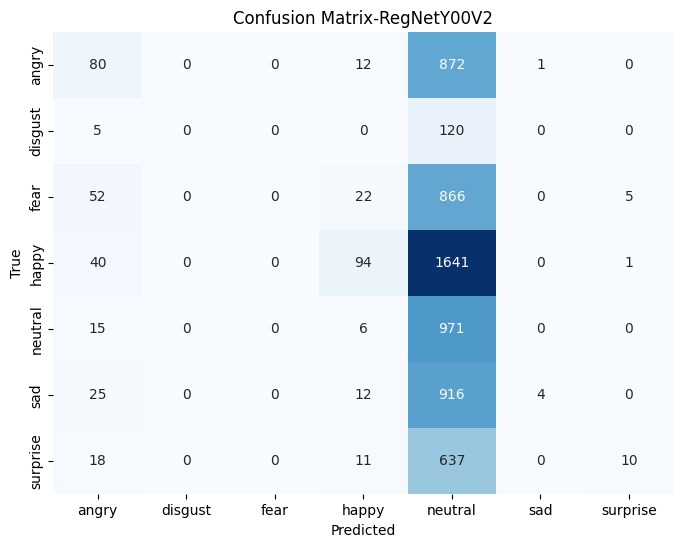

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the Matplotlib figure and axis
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix-RegNetY00V2')
plt.show()